In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("antoreepjana/animals-detection-images-dataset")
print("Path to dataset files:", path)



Path to dataset files: C:\Users\saisr\.cache\kagglehub\datasets\antoreepjana\animals-detection-images-dataset\versions\7


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\saisr\.cache\kagglehub\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5


In [3]:
import os

# Inspect the dataset
print("Dataset path:", path)
print("Files and directories in the dataset:")
print(os.listdir(path))


Dataset path: C:\Users\saisr\.cache\kagglehub\datasets\iamsouravbanerjee\animal-image-dataset-90-different-animals\versions\5
Files and directories in the dataset:
['animals', 'name of the animals.txt']


In [4]:
import glob

# Find all image files in the dataset directory
image_files = glob.glob(f"{path}/**/*.*", recursive=True)

# Filter out non-image files by extensions
image_files = [f for f in image_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"Found {len(image_files)} image(s) in the dataset.")


Found 5400 image(s) in the dataset.


Total images found: 5400
Processing 10 samples...
Processing 7cbb6ecd6a.jpg...

0: 416x640 1 bird, 74.0ms
Speed: 3.0ms preprocess, 74.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)


Detected objects in 7cbb6ecd6a.jpg: ['bird']

Processing 0fe508ab40.jpg...

0: 352x640 1 elephant, 64.7ms
Speed: 2.0ms preprocess, 64.7ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)


Detected objects in 0fe508ab40.jpg: ['elephant']

Processing a6487454a4.jpg...

0: 480x640 1 bowl, 74.9ms
Speed: 4.0ms preprocess, 74.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


Detected objects in a6487454a4.jpg: ['bowl']

Processing 2f2b464cc6.jpg...

0: 256x640 1 car, 77.6ms
Speed: 2.0ms preprocess, 77.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)


Detected objects in 2f2b464cc6.jpg: ['car']

Processing 244ef898cd.jpg...

0: 352x640 1 bowl, 1 broccoli, 1 dining table, 60.2ms
Speed: 3.0ms preprocess, 60.2ms inference, 1.0ms postpro

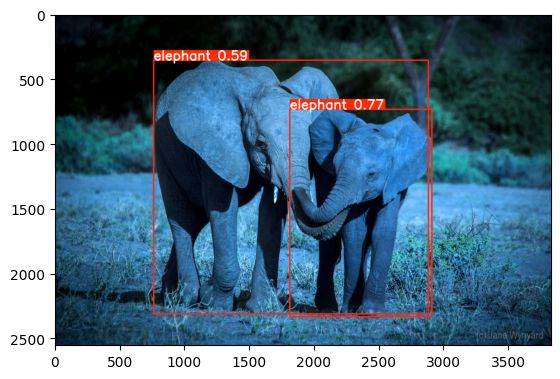

In [15]:
import glob
import random
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Define the list of animals
animals = [
    "Dog", "Cat", "Zebra", "Lion", "Leopard", "Cheetah", "Tiger", "Bear", "Brown Bear",
    "Butterfly", "Canary", "Crocodile", "Polar Bear", "Bull", "Camel", "Crab",
    "Chicken", "Centipede", "Cattle", "Caterpillar", "Duck","Kangaroo","ox"
]

# Load YOLO model
model = YOLO("yolov8n.pt")  # Pretrained YOLOv8 model

# Find all image files
image_files = glob.glob(f"{path}/**/*.*", recursive=True)
image_files = [f for f in image_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"Total images found: {len(image_files)}")

# Ensure at least one sample from each category
random_samples = random.sample(image_files, min(len(image_files), 10))  # Adjust sample size as needed

print(f"Processing {len(random_samples)} samples...")

for image_path in random_samples:
    print(f"Processing {os.path.basename(image_path)}...")

    # Load the image
    image = cv2.imread(image_path)

    # Check if the image is valid
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Run object detection
    results = model(image)

    # Annotate the image
    annotated_image = results[0].plot()

    # Display the annotated image
    plt.imshow(annotated_image)
    print("\n")

    # Print detected classes
    detected_classes = [model.names[int(cls)] for cls in results[0].boxes.cls]
    print(f"Detected objects in {os.path.basename(image_path)}: {detected_classes}\n")
